In [58]:
import numpy as np

import pandas as pd
from pandas import Timedelta as td
import matplotlib.pyplot as plt

In [59]:
from utils.audio_to_logits import infer_character_distribution, alphabet, STEP_MS

filepath = 'audio/02-11-30-short.wav'
true_text = "with the progressive dawn the outlines of an immense camp became visible"

logits = infer_character_distribution(filepath)

In [62]:
alph = np.array(list(alphabet._str_to_label.keys()) + ['-'])
timesteps = pd.timedelta_range(start=td(0), periods=logits.shape[0], freq=td(f'{STEP_MS} ms'))
probdist = pd.DataFrame(logits,
                        index=timesteps,
                        columns=alph)
probdist

,,a,b,c,d,e,f,g,h,i,...,s,t,u,v,w,x,y,z,',-
00:00:00,0.000007,0.000027,4.621010e-07,0.000002,6.310609e-07,0.000003,4.852125e-07,0.000003,5.671518e-07,0.000009,...,0.000009,0.000009,0.000010,1.458686e-07,0.000004,1.052257e-07,0.000019,2.561006e-08,5.195279e-07,0.999885
00:00:00.020000,0.000007,0.000005,9.323957e-06,0.000002,2.363375e-06,0.000002,2.164003e-06,0.000007,1.120165e-06,0.000016,...,0.000011,0.000048,0.000007,2.362756e-07,0.000018,9.535923e-08,0.000021,1.413997e-08,3.036690e-07,0.999813
00:00:00.040000,0.000005,0.000006,1.298754e-05,0.000003,2.103514e-06,0.000003,3.529280e-06,0.000004,3.806056e-06,0.000022,...,0.000005,0.000033,0.000008,1.240120e-07,0.000025,1.720524e-08,0.000051,7.355836e-09,2.771724e-07,0.999779
00:00:00.060000,0.000003,0.000016,1.536904e-05,0.000002,1.579160e-06,0.000006,3.284241e-06,0.000001,4.978371e-06,0.000055,...,0.000003,0.000006,0.000007,4.408792e-08,0.000020,9.975881e-09,0.000059,2.312155e-09,3.776414e-07,0.999760
00:00:00.080000,0.000004,0.000026,1.754366e-05,0.000005,3.754077e-06,0.000011,6.132962e-06,0.000002,1.630594e-05,0.000045,...,0.000009,0.000018,0.000023,2.883358e-07,0.000059,1.003231e-07,0.000147,2.678794e-08,5.872891e-07,0.999520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:00:05.660000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960
00:00:05.680000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960
00:00:05.700000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960
00:00:05.720000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960


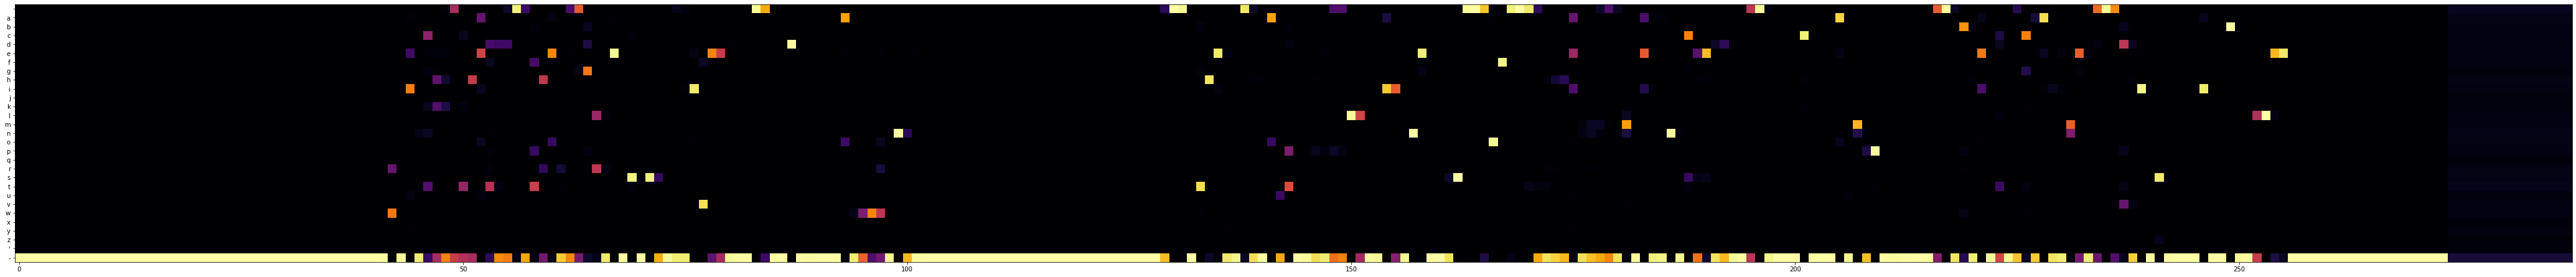

In [4]:
plt.figure(figsize=(len(probdist) / 5, 20))
plt.imshow(logits.T, cmap='inferno')
plt.yticks(np.arange(len(alph)), alph)
plt.tight_layout()
plt.show()

In [63]:
# Top three characters for every moment
top_chars = logits.argsort(axis=1)[:, ::-1]
top_n_chars = 3

top = np.hstack([
    alph[top_chars][:, :top_n_chars],
    logits[np.repeat([np.arange(top_chars.shape[0])], top_n_chars, axis=0).T, top_chars[:, :top_n_chars]].round(2)
])
top

array([['-', 'a', 'y', '1.0', '0.0', '0.0'],
       ['-', 't', 'y', '1.0', '0.0', '0.0'],
       ['-', 'y', 't', '1.0', '0.0', '0.0'],
       ...,
       ['-', ' ', 't', '0.1', '0.06', '0.05'],
       ['-', ' ', 't', '0.1', '0.06', '0.05'],
       ['-', ' ', 't', '0.1', '0.06', '0.05']], dtype='<U32')

In [133]:
start_s, end_s = 0, 5.2  # seconds of start and end of the target clip
start_t, end_t = int(start_s * 1000 / STEP_MS), int(end_s * 1000 / STEP_MS)

probs = logits.copy()[start_t:end_t, :]  # the progressive dawn
probs[:, 0] += probs[:, -1]  # mix spaces and blanks (for simplicity)

# If the model inserts a blank or a space after a character,
# prolong that character's probability so that DTW simply repeats it,
# instead of stopping the thread, for example:
#   blank  d    a    w        blank  d    a    w
#     0    0.8  0    0          0    0.8  0    0
#     0.5  0.1  0    0          0.5  0.5  0    0
#     0.8  0    0    0    ->    0.8  0.4  0    0
#     0.1  0    0.7  0          0.1  0    0.7  0
#     0    0    0    0.7        0    0    0    0.7
for i in range(1, len(probs)):
    probs[i, 1:-1] += probs[i, 0] * probs[i - 1, 1:-1]

# Surround with blanks b/c recording has silence in the beginning and at the end
# and one of assumptions of DTW is that index of one array maps onto first index of the other array
# transcript = ' with the progressive dawn '
transcript = ' the outlines of an immense camp became visible '
# transcript = ' ' + true_text + ' '

trpt_ind_map = pd.Series(np.arange(len(alph)), index=alph)

trpt_inds = trpt_ind_map[list(transcript)].values
p_fit = probs[:, trpt_inds]

mapping = pd.DataFrame(p_fit, columns=list(transcript))
mapping

,,t,h,e,,o,u,t,l,i,...,e,,v,i,s,i,b,l,e,
0,0.999891,0.000009,5.671518e-07,0.000003,0.999891,0.000002,0.000010,0.000009,5.893808e-07,0.000009,...,0.000003,0.999891,1.458686e-07,0.000009,0.000009,0.000009,4.621010e-07,5.893808e-07,0.000003,0.999891
1,0.999821,0.000057,1.687215e-06,0.000005,0.999821,0.000010,0.000017,0.000057,4.705794e-06,0.000025,...,0.000005,0.999821,3.821180e-07,0.000025,0.000020,0.000025,9.785975e-06,4.705794e-06,0.000005,0.999821
2,0.999783,0.000090,5.492906e-06,0.000007,0.999783,0.000018,0.000025,0.000090,8.441752e-06,0.000047,...,0.000007,0.999783,5.060473e-07,0.000047,0.000026,0.000047,2.277140e-05,8.441752e-06,0.000007,0.999783
3,0.999763,0.000096,1.046998e-05,0.000013,0.999763,0.000035,0.000032,0.000096,9.790424e-06,0.000102,...,0.000013,0.999763,5.500155e-07,0.000102,0.000029,0.000102,3.813505e-05,9.790424e-06,0.000013,0.999763
4,0.999523,0.000114,2.677093e-05,0.000024,0.999523,0.000057,0.000055,0.000114,1.220375e-05,0.000147,...,0.000024,0.999523,8.380890e-07,0.000147,0.000038,0.000147,5.566053e-05,1.220375e-05,0.000024,0.999523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.061743,0.000150,8.501565e-07,0.989216,0.061743,0.000011,0.000002,0.000150,1.016204e-02,0.000022,...,0.989216,0.061743,5.606421e-08,0.000022,0.000053,0.000022,1.371318e-05,1.016204e-02,0.989216,0.061743
256,0.999886,0.000155,8.865193e-07,0.989111,0.999886,0.000011,0.000002,0.000155,1.016406e-02,0.000022,...,0.989111,0.999886,5.752527e-08,0.000022,0.000113,0.000022,1.430076e-05,1.016406e-02,0.989111,0.999886
257,0.999942,0.000161,1.310787e-06,0.989054,0.999942,0.000012,0.000002,0.000161,1.016482e-02,0.000023,...,0.989054,0.999942,6.136710e-08,0.000023,0.000131,0.000023,1.475968e-05,1.016482e-02,0.989054,0.999942
258,0.999943,0.000169,4.135341e-06,0.988997,0.999943,0.000013,0.000003,0.000169,1.016650e-02,0.000024,...,0.988997,0.999943,7.508352e-08,0.000024,0.000146,0.000024,1.570097e-05,1.016650e-02,0.988997,0.999943


In [134]:
import utils.fastdtw
from importlib import reload
reload(utils.fastdtw)
from utils.fastdtw import fastdtw

trpt_inds = trpt_ind_map[list(transcript)].values
dist, path = fastdtw(np.arange(len(probs)), trpt_inds, radius=50,
                     dist=lambda mat_i, trpt_i: -probs[int(mat_i), int(trpt_i)])
for i, j in path:
    print(i, j, transcript[j])

0 0  
1 0  
2 0  
3 0  
4 0  
5 0  
6 0  
7 0  
8 0  
9 0  
10 0  
11 0  
12 0  
13 0  
14 0  
15 0  
16 0  
17 0  
18 0  
19 0  
20 0  
21 0  
22 0  
23 0  
24 0  
25 0  
26 0  
27 0  
28 0  
29 0  
30 0  
31 0  
32 0  
33 0  
34 0  
35 0  
36 0  
37 0  
38 0  
39 0  
40 0  
41 0  
42 0  
43 0  
44 0  
45 0  
46 0  
47 0  
48 0  
49 0  
50 0  
51 0  
52 0  
53 0  
54 0  
55 0  
56 0  
57 0  
58 0  
59 0  
60 0  
61 0  
62 0  
63 0  
64 0  
65 0  
66 0  
67 0  
68 0  
69 0  
70 0  
71 0  
72 0  
73 0  
74 0  
75 0  
76 0  
77 0  
78 0  
79 0  
80 0  
81 0  
82 0  
83 0  
84 0  
85 0  
86 0  
87 0  
88 0  
89 0  
90 0  
91 0  
92 0  
93 0  
94 0  
95 0  
96 0  
97 0  
98 0  
99 0  
100 0  
101 0  
102 0  
103 0  
104 0  
105 0  
106 0  
107 0  
108 0  
109 0  
110 0  
111 0  
112 0  
113 0  
114 0  
115 0  
116 0  
117 0  
118 0  
119 0  
120 0  
121 0  
122 0  
123 0  
124 0  
125 0  
126 0  
127 0  
128 0  
129 0  
130 0  
131 0  
132 0  
133 1 t
134 2 h
135 3 e
136 4  
137 4  
138 4 

In [109]:
import struct
import wave


def read_samples(wave_file, nb_frames):
    frame_data = wave_file.readframes(nb_frames)
    if frame_data:
        sample_width = wave_file.getsampwidth()
        nb_samples = len(frame_data) // sample_width
        format = {1: "%db", 2: "<%dh", 4: "<%dl"}[sample_width] % nb_samples
        return struct.unpack(format, frame_data)
    else:
        return ()


w = wave.open(filepath, 'r')
samples = np.array(read_samples(w, w.getnframes()))

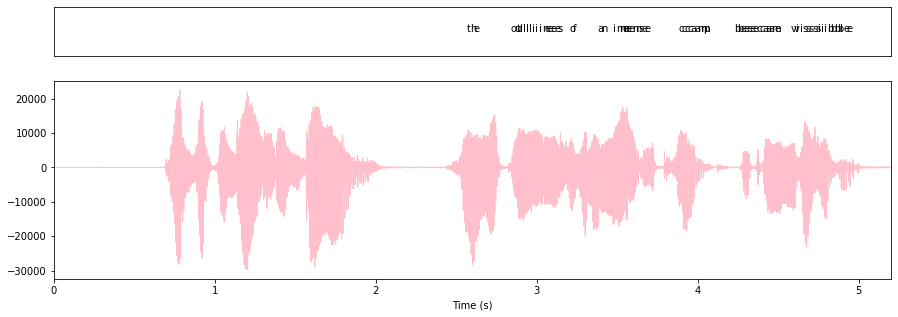

In [142]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(15, 5), gridspec_kw=dict(height_ratios=[1, 4]))

sub_samples = samples[int(start_s * w.getframerate()):int(end_s * w.getframerate())].copy()

t = np.linspace(0, len(sub_samples) / w.getframerate(), len(sub_samples))
ax2.plot(t, sub_samples, color='pink', lw=1)

next_j = path[1][1]
for i, (rec_i, trpt_i) in enumerate(path[:-1]):
    next_j = path[i + 1][1]
    if rec_i != next_j:
        ax1.annotate(transcript[trpt_i], xy=(rec_i * 19.3 / 1000, 0.5))
    # print(i, j, transcript[i])

ax2.set_xlim(0, t.max())
ax1.set_xlim(0, t.max())

ax2.set_xlabel('Time (s)')
# hide axes for text
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
plt.show()

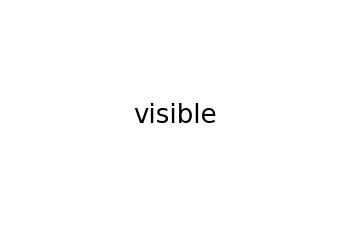

In [143]:
from matplotlib import animation

spaces = np.argwhere(trpt_inds == 0)[:, 0]
word_starts = spaces[:-1] + 1
word_ends = spaces[1:]# - 1
np.vstack([word_starts, word_ends])

ind_word_mad = pd.Series([np.nan] * len(trpt_inds))
ind_word_mad[word_starts] = np.arange(len(word_starts))
ind_word_mad = ind_word_mad.ffill()


def animate(step):
    plt.cla()
    plt.gca().axis('off')
    trpt_i = path[step][1]
    word_i = ind_word_mad[trpt_i]
    if pd.isna(word_i):  # words haven't began yet
        word = ''
    else:
        word_i = int(word_i)
        word = transcript[word_starts[word_i]: word_ends[word_i]]
    return [plt.annotate(word, xy=(0.5, 0.5), fontsize=26, ha='center', va='center')]

anim = animation.FuncAnimation(plt.figure(),
                               animate,
                               frames=len(probs),
                               interval=19.3,
                               blit=True)
anim.save('out/animation-2.mp4', writer='ffmpeg')

In [191]:
import os

# cmd = f"ffmpeg -i out/animation-2.mp4 -i {filepath} -c:v copy -c:a aac out/output-2.mp4"
# os.system(cmd)

cmd = f"ffmpeg -ss 0 -i out/animation-1.mp4 -to 1.9 -c copy -copyts out/preout-1.mp4"
os.system(cmd)
cmd = f"ffmpeg -i out/animation-2.mp4 -ss 1.9 -c copy -copyts out/preout-2.mp4"
os.system(cmd)
cmd = """(echo file 'preout-1.mp4' & echo file 'preout-2.mp4' )>out/preout.txt"""
os.system(cmd)
cmd = """ffmpeg -f concat -i out/preout.txt out/preout.mp4"""
os.system(cmd)
cmd = f"ffmpeg -i out/preout.mp4 -i {filepath} -c:v copy -c:a aac out/output.mp4"
os.system(cmd)

0